In [33]:
# Importing Standard Libraries
import graphviz
import pandas as pd
import numpy as np
from csv import reader

# Sklearn Libraries
from sklearn import tree
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
from sklearn.naive_bayes import *
from sklearn.cluster import KMeans, DBSCAN
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, export_text
import pydotplus

# Importing mlxtend Libraries
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Graphing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import graphviz
import plotly.offline as pyo



In [34]:
np.random.seed(0)

# Importing the Data Set
# df =  pd.read_csv("bank.csv")
df =  pd.read_csv("bank-full.csv")
df.head()

# Establishing copies for running through the different scrubs
df_a = df.copy()
df_b = df.copy()

#### Feature Engineering

In [35]:
# Creating Categories for ages then making categories
df_b['job'] = df_b['job'].astype('category')
df_b['job'] = df_b['job'].cat.codes
df_b['marital'] = df_b['marital'].astype('category')
df_b['marital'] = df_b['marital'].cat.codes
df_b['education'] = df_b['education'].astype('category')
df_b['education'] = df_b['education'].cat.codes
df_b['default'] = df_b['default'].astype('category')
df_b['default'] = df_b['default'].cat.codes
df_b['contact'] = df_b['contact'].astype('category')
df_b['contact'] = df_b['contact'].cat.codes
df_b['month'] = df_b['month'].astype('category')
df_b['month'] = df_b['month'].cat.codes
df_b['poutcome'] = df_b['poutcome'].astype('category')
df_b['poutcome'] = df_b['poutcome'].cat.codes
df_b['housing'] = df_b['housing'].astype('category')
df_b['housing'] = df_b['housing'].cat.codes
df_b['loan'] = df_b['loan'].astype('category')
df_b['loan'] = df_b['loan'].cat.codes
df_b['y'] = df_b['y'].astype('category')
df_b['y'] = df_b['y'].cat.codes
df_b = df_b.drop('pdays',axis=1)
df_b['balance'] = (df_b['balance'] - df_b['balance'].min()) / ( df_b['balance'].max() - df_b['balance'].min())
print("Post Conversion of Data into numeric, dropping pdays, and normalizing balance:")
df_b.head(10)

Post Conversion of Data into numeric, dropping pdays, and normalizing balance:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,198,1,0,3,0
5,35,4,1,2,0,0.074901,1,0,2,5,8,139,1,0,3,0
6,28,4,2,2,0,0.076862,1,1,2,5,8,217,1,0,3,0
7,42,2,0,2,1,0.072822,1,0,2,5,8,380,1,0,3,0
8,58,5,1,0,0,0.073902,1,0,2,5,8,50,1,0,3,0
9,43,9,2,1,0,0.078187,1,0,2,5,8,55,1,0,3,0


Step 1. Standardize the Dat

In [36]:
df_c_scaled = df_b.copy()
df_c_scaled[df_c_scaled.columns] = StandardScaler().fit_transform(df_c_scaled)
df_c_scaled.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,-0.135490,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.135490,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.135490,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.135490,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.135490,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.25194,0.444898,-0.363983
5,-0.559037,-0.103820,-0.275762,1.036362,-0.135490,-0.371551,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.462724,-0.569351,-0.25194,0.444898,-0.363983
6,-1.218254,-0.103820,1.368372,1.036362,-0.135490,-0.300608,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.159841,-0.569351,-0.25194,0.444898,-0.363983
7,0.100181,-0.714951,-1.919895,1.036362,7.380625,-0.446762,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.473107,-0.569351,-0.25194,0.444898,-0.363983
8,1.606965,0.201746,-0.275762,-1.637474,-0.135490,-0.407679,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.808322,-0.569351,-0.25194,0.444898,-0.363983
9,0.194355,1.424008,1.368372,-0.300556,-0.135490,-0.252657,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.788906,-0.569351,-0.25194,0.444898,-0.363983


Step 2. Feature Reduction

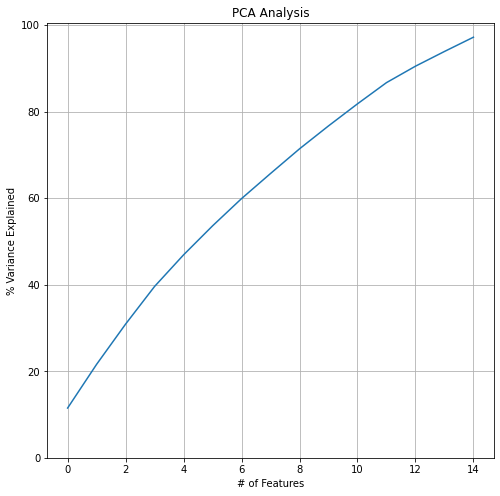

In [37]:
pca = PCA(n_components=15)
pca.fit(df_c_scaled)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(8,8))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.grid()


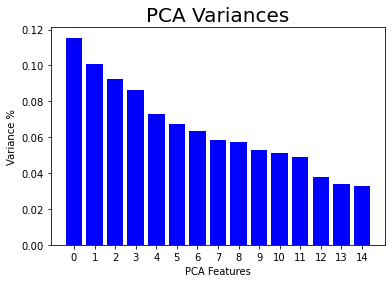

In [38]:
principalComponents =pca.fit_transform(df_c_scaled)

# Plotting the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA Features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title("PCA Variances", fontsize=20)
plt.show()

At 9 features we are able to predict about 75 percent of the variance. It is for this reason we will start
With tis many featuers

Below is the graphing for PCA components2

In [47]:
pca = PCA(n_components=2)
pca.fit(df_c_scaled)
pca_scale = pca.transform(df_c_scaled)

pca_df = pd.DataFrame(pca_scale, columns=["pc1", "pc2"])
print(pca.explained_variance_ratio_)
pca_df

[0.11546334 0.10081603]


,pc1,pc2
0,-1.275291,0.488806
1,-1.228746,0.825973
2,-2.173598,1.377833
3,-1.288503,0.732542
4,0.102993,-0.277942
...,...,...
45206,2.080115,-0.929391
45207,0.695008,-1.039668
45208,2.585428,-0.207646
45209,-0.782419,-0.530579


Tuning the EPS Value

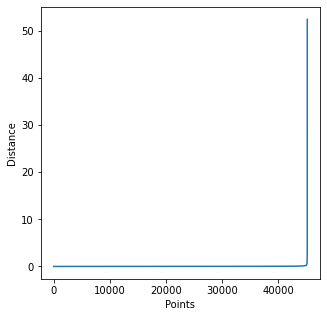

In [75]:
nearest_neighbors= NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(pca_df)
distances, indices = neighbors.kneighbors(pca_df)
distances = np.sort(distances[:,3], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

<Figure size 360x360 with 0 Axes>

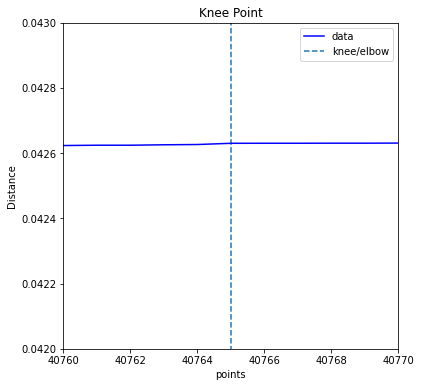

In [99]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve="convex",
                   direction='increasing', interp_method="polynomial")
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("points")
plt.ylabel("Distance")
plt.axis([40760, 40770, .0420, .043])
plt.show()

The Graph Above is zoomed in on the knee point. This lets
us assume the best esps is .0426

From here we can now run the DBScan

In [104]:
db = DBSCAN(eps=0.426, min_samples=4).fit(pca_df)
labels = db.labels_
fig = plt.figure(figsize=(5,5))
sns.scatterplot(pca_df[:,0], pca[:,1], hue=["cluster-{}".format(x) for x in labels])

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 360x360 with 0 Axes>